# Preprocessing of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import sklearn

Import the data for the NJ train network. Month of March 2018. Drop the observations with NaN delay.

In [2]:
df = pd.read_csv('2018_03.csv')
df.dropna(subset=['delay_minutes'], inplace=True)
df.reset_index(drop=True, inplace=True)

Encoding the days of the week (0 : Monday ..., 6 : Sunday) 

In [3]:
day = []
time = []

for (k,v) in enumerate(df['actual_time']):
    aux = datetime.datetime.strptime(v, '%Y-%m-%d %H:%M:%S')
    time_only = aux.time()
    day.append(aux.weekday())
    time_in_min = time_only.hour*60 + time_only.minute
    time.append(time_in_min)
    
df['day'] = day
df['time'] = time

In [4]:
df.head(n=5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,2018-03-01,3805,1.0,New York Penn Station,105,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit,4,81
1,2018-03-01,3805,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit,4,91
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit,4,100
3,2018-03-01,3805,4.0,Newark Penn Station,107,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,105
4,2018-03-01,3805,5.0,Newark Airport,37953,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit,4,109


Encoding the line names and the departure station with label encoding

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['line'] = le.fit_transform(df['line'])
df['from_id'] = le.fit_transform(df['from_id'])
df['train_id'] = le.fit_transform(df['train_id'])

In [6]:
df.head(n=40)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type,day,time
0,2018-03-01,562,1.0,New York Penn Station,97,New York Penn Station,105,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,7,NJ Transit,4,81
1,2018-03-01,562,2.0,New York Penn Station,97,Secaucus Upper Lvl,38187,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,7,NJ Transit,4,91
2,2018-03-01,562,3.0,Secaucus Upper Lvl,159,Newark Penn Station,107,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,7,NJ Transit,4,100
3,2018-03-01,562,4.0,Newark Penn Station,99,Newark Airport,37953,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,7,NJ Transit,4,105
4,2018-03-01,562,5.0,Newark Airport,155,North Elizabeth,109,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,7,NJ Transit,4,109
5,2018-03-01,562,6.0,North Elizabeth,101,Elizabeth,41,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016667,departed,7,NJ Transit,4,112
6,2018-03-01,562,7.0,Elizabeth,38,Linden,70,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083333,departed,7,NJ Transit,4,118
7,2018-03-01,562,8.0,Linden,64,Rahway,127,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,departed,7,NJ Transit,4,121
8,2018-03-01,562,9.0,Rahway,119,Metropark,83,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,departed,7,NJ Transit,4,128
9,2018-03-01,562,10.0,Metropark,75,Metuchen,84,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166667,departed,7,NJ Transit,4,133


In [7]:
df.drop(columns = ['date','from','to','to_id','scheduled_time','status','type','actual_time'], inplace = True)


In [8]:
df.head(n=50)
#len(df)

,train_id,stop_sequence,from_id,delay_minutes,line,day,time
0,562,1.0,97,0.000000,7,4,81
1,562,2.0,97,0.133333,7,4,91
2,562,3.0,159,0.116667,7,4,100
3,562,4.0,99,0.166667,7,4,105
4,562,5.0,155,0.166667,7,4,109
5,562,6.0,101,0.016667,7,4,112
6,562,7.0,38,0.083333,7,4,118
7,562,8.0,64,0.000000,7,4,121
8,562,9.0,119,0.000000,7,4,128
9,562,10.0,75,0.166667,7,4,133


In [9]:
x = df['time'].as_matrix()

C:\Users\Linah Charif\Anaconda3\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Epoch 1/2
 - 188s - loss: 0.0015
Epoch 2/2
 - 192s - loss: 0.0014
Train Score: 4.14 RMSE
Test Score: 2.49 RMSE


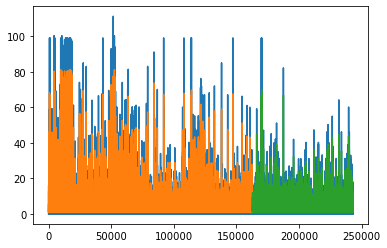

In [14]:
# LSTM with window regression framing

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataset = df['delay_minutes']
dataset = dataset.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=2, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()